### Skład grupy:

Natalia Przewdzięk 276052

Mateusz Skrzątek 275975

Agata Stachnio 268330

# Wprowadzenie

Współczesne systemy komputerowe często wymagają generowania liczb pseudolosowych, które są kluczowe w wielu aplikacjach, takich jak symulacje, kryptografia, gry komputerowe czy algorytmy Monte Carlo. Generatory liczb pseudolosowych (PRNG - Pseudorandom Number Generators) to algorytmy, które generują sekwencje liczb przypominające losowe. Jednym z takich generatorów jest generator ACORN (Additive Congruential Random Number generator).

# Opis generatora ACORN

Generator ACORN jest jedną z metod generowania liczb pseudolosowych, opierającą się na kongruencjach dodawczych. Jest to prosty i efektywny algorytm, który może generować liczby pseudolosowe o wysokiej jakości.

## Parametry generatora

- **k**: liczba stanów w generatorze. Im większa liczba stanów, tym bardziej złożona jest sekwencja generowanych liczb.
- **M**: moduł używany do obliczeń. Typowo jest to duża liczba pierwsza, co zapewnia dobrą jakość losowości.
- **lag**: liczba kroków opóźnienia. Parametr ten wpływa na okres generatora oraz jakość generowanych liczb.

## Zasada działania


Generator ACORN k-tego rzędu oparty jest na ciągach liczbowych zdefiniowanych poprzez równania rekurencyjne. Główne kroki algorytmu to:

1. Inicjalizacja stanu początkowego, zwykle z wartości 1.
2. Iteracyjne obliczanie nowych stanów, gdzie każdy stan jest sumą poprzedniego stanu i stanu sprzed kilku kroków, wszystko w arytmetyce modularnej.
3. Generowanie liczby pseudolosowej poprzez odpowiednią normalizację ostatniego stanu.

Matematycznie można to przedstawić następująco:


$$ X_n^{0} = X_{n-1}^{0}, \quad n \geq 1 $$

$$ X_n^{m} = (X_{n}^{m-1} + X_{n-1}^{m}) \mod M, \quad m = 1, \ldots, k, \ n \geq 1 $$

$$ Y_n^{k} = \frac{X_n^{k}}{M}, \quad n \geq 1 $$

gdzie $ X_m^{n}$ oznacza $m$-ty stan w $n$-tym kroku.

### Generowanie sekwencji $ Y_n^{k}$

Po ustaleniu początkowego stanu, generator ACORN generuje sekwencję $ Y_n^{k} $ poprzez normalizację stanów $ X _n^{k} $ do przedziału $[0, 1]$ za pomocą dzielenia przez $ M $

# Implementacja generatora ACORN

Przedstawiona poniżej implementacja w Pythonie pozwala na generowanie liczb pseudolosowych przy użyciu generatora ACORN. Klasa `ACORNGenerator` umożliwia inicjalizację generatora z danymi parametrami, generowanie pojedynczej liczby pseudolosowej oraz całych sekwencji.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

class ACORNGenerator:
    def __init__(self, k: int, M: int, lag: int):
        '''
        Inicjalizuje generator ACORN z danymi parametrami.

        Parametry:
        k (int): Liczba stanów w generatorze.
        M (int): Moduł używany do obliczeń.
        lag (int): Liczba kroków opóźnienia.
        '''
        self.k = k  # Ustawienie parametru k (ilość stanów)
        self.M = M  # Ustawienie modułu M
        self.lag = lag  # Ustawienie opóźnienia (lag)
        self.state = [0] * (k + 1)  # Inicjalizacja listy stanów o długości k+1
        self.state[0] = 1  # Ustawienie początkowej wartości stanu X_0^0 na 1 (może być dowolna różna od 0)

    def next(self) -> int:
        '''
        Generuje następny stan generatora ACORN.

        Zwraca:
        int: Nowy stan generatora (ostatni element listy stanów).
        '''
        new_state = self.state[:]  # Tworzenie kopii aktualnego stanu
        for i in range(1, self.k + 1):
            # Aktualizacja stanu na podstawie poprzedniego
            new_state[i] = (self.state[i] + self.state[i-1]) % self.M
        self.state = new_state  # Aktualizacja stanu generatora
        return new_state[-1]  # Zwracanie ostatniego elementu (nowego stanu)

    def random(self) -> float:
        '''
        Generuje liczbę pseudolosową na podstawie aktualnego stanu generatora.

        Zwraca:
        float: Liczba pseudolosowa w zakresie od 0 do 1.

        Przykład użycia:
        >>> generator = ACORNGenerator(k=9, M=2**89 - 1, lag=10**4)
        >>> random_number = generator.random()
        0.11738263817466567
        '''
        for _ in range(self.lag):
            self.next()  # Generowanie kolejnych stanów na podstawie opóźnienia (lag)
        return self.next() / self.M  # Zwracanie liczby pseudolosowej w zakresie od 0 do 1
    
    def random_sequence(self, n: int) -> list:
        '''
        Zwraca listę n-elementową zawierającą liczby pseudolosowe z zakresu od 0 do 1 z generatora ACORN.

        Parametry:
        n (int): Liczba liczb pseudolosowych do wygenerowania.

        Zwraca:
        list: Lista n-elementowa zawierająca liczby pseudolosowe z zakresu od 0 do 1.

        Przykład użycia:
        >>> generator = ACORNGenerator(k=9, M=2**89 - 1, lag=10**4)
        >>> random_numbers = generator.random_sequence(10)
        [0.1299662344148558, 0.3600294569176941, 0.15293301970115997, 0.4685026357967644, 0.47101705966690466, 0.3603000228682221, 0.9049267176819464, 0.4173007596030548, 0.249336261222097, 0.28669177714674815]
        '''
        return [self.random() for _ in range(n)]

# Analiza wyników

Aby ocenić jakość liczb pseudolosowych generowanych przez ACORN, można porównać histogram oraz dystrybuantę empiryczną liczb wygenerowanych przez ACORN z teoretycznymi wartościami gęstości i dystrybuanty rozkładu jednostajnego $U(0,1)$.

Poniższe funkcje `ACORN_NUMPY_HISTOGRAM` oraz `ACORN_NUMPY_DISTRIBUTION` pozwalają na wizualne porównanie wyników.

In [16]:
def ACORN_NUMPY_HISTOGRAM(acorn_random_numbers: list, b: int):
    '''
    Generuje i porównuje histogram liczb pseudolosowych wygenerowanych przez generator ACORN z gęstością teoretyczną rozkładu jednostajnego (0,1).

    Parametry:
    acorn_random_numbers (list): Lista wygenerowanych liczb przez generator ACORN.
    b (int): Liczba przedziałów w histogramie.
    
    Przykład użycia:
    >>> generator = ACORNGenerator(k=9, M=2**89 - 1, lag=10**4)
    >>> random_numbers = generator.random_sequence(1000)
    >>> ACORN_NUMPY_HISTOGRAM(random_numbers, b=30)
    '''
    # Histogram generatora ACORN
    plt.figure(figsize=(8, 6))
    plt.hist(acorn_random_numbers, bins=b, alpha=0.6, label='ACORN', density=True)
    
    # Dodanie teoretycznej gęstości rozkładu jednostajnego
    x = np.linspace(0, 1, 1000)
    y = uniform_pdf(x) # Teoretyczna funkcja dystrybuanty rozkładu jednostajnego na przedziale (0,1)
    plt.plot(x, y, 'r-', lw=2, label='Teoretyczna gęstość rozkładu jednostajnego')

    plt.legend()
    plt.title('Histogram generatora ACORN z teoretyczną gęstością rozkładu jednostajnego', fontsize=16)
    plt.xlabel('Wartość', fontsize=14)
    plt.ylabel('Gęstość', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(linestyle = '--')
    plt.show()
    
def ACORN_NUMPY_DISTRIBUTION(acorn_random_numbers: list):
    '''
    Generuje i porównuje dystrybuantę empiryczną liczb pseudolosowych wygenerowanych przez generator ACORN z dystrybuantą rozkładu jednostajnego (0,1).

    Parametry:
    acorn_random_numbers (list): Lista wygenerowanych liczb przez generator ACORN.
    
    Przykład użycia:
    >>> generator = ACORNGenerator(k=9, M=2**89 - 1, lag=10**4)
    >>> random_numbers = generator.random_sequence(1000)
    >>> ACORN_NUMPY_DISTRIBUTION(random_numbers)
    '''
    
    # Sortowanie danych
    acorn_sorted = np.sort(acorn_random_numbers)
    
    # Obliczanie dystrybuanty empirycznej
    acorn_ecdf = np.arange(1, len(acorn_sorted)+1) / len(acorn_sorted)
    
    # Wykres dystrybuanty empirycznej generatora ACORN
    plt.figure(figsize=(8, 6))
    plt.plot(acorn_sorted, acorn_ecdf, alpha=0.7, label='ACORN')
    
    # Dodanie teoretycznej dystrybuanty rozkładu jednostajnego
    x = np.linspace(0, 1, 1000)
    y = uniform_cdf(x) # Teoretyczna funkcja gęstości prawdopodobieństwa rozkładu jednostajnego na przedziale (0,1)
    plt.plot(x, y, 'r-', alpha=0.3, lw=2, label='Teoretyczna dystrybuanta rozkładu jednostajnego')
    
    plt.legend()
    plt.title('Wykres dystrybuant generatora ACORN  z teoretyczną dystrybuantą rozkładu jednostajnego', fontsize=16)
    plt.xlabel('Wartość', fontsize=14)
    plt.ylabel('Dystrybuanta', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(linestyle = '--')
    plt.show()
    
def uniform_pdf(x: float) -> float:
    """
    Teoretyczna funkcja gęstości prawdopodobieństwa (PDF) rozkładu jednostajnego na przedziale (0,1).
    
    Args:
    x (float or array_like): Wartość(y), dla której(y) chcemy obliczyć PDF.
    
    Returns:
    float or array_like: Wartość(y) PDF dla danego x.
    
    Przykład użycia:
    >>> print(uniform_pdf(0.5))
    1
    >>> print(uniform_pdf(-0.1))
    0
    >>> print(uniform_pdf([0.1, 0.5, 1.5]))
    [1 1 0]
    """
    if isinstance(x, (int, float)):
        if 0 <= x <= 1:
            return 1
        else:
            return 0
    else:
        x = np.asarray(x)
        return np.where((x >= 0) & (x <= 1), 1, 0)

def uniform_cdf(x: float) -> float:
    """
    Teoretyczna dystrybuanta (CDF) rozkładu jednostajnego na przedziale (0,1).
    
    Args:
    x (float or array_like): Wartość(y), dla której(y) chcemy obliczyć CDF.
    
    Returns:
    float or array_like: Wartość(y) CDF dla danego x.
    
    Przykład użycia:
    >>> print(uniform_cdf(0.5))
    0.5
    >>> print(uniform_cdf(-0.1))
    0
    >>> print(uniform_cdf(1.5))
    1
    >>> print(uniform_cdf([0.1, 0.5, 1.5]))
    [0.1 0.5 1. ]
    """
    if isinstance(x, (int, float)):
        if x < 0:
            return 0
        elif x > 1:
            return 1
        else:
            return x
    else:
        x = np.asarray(x)
        return np.clip(x, 0, 1)

In [2]:
# Parametry
M = 2**89 - 1
k = 9
lag = 10**3
n = 10**7
b = 200

In [4]:
acorn = ACORNGenerator(k, M, lag)  # Inicjalizacja generatora ACORN
acorn_random_numbers = acorn.random_sequence(n)  # Generowanie losowych liczb za pomocą ACORN

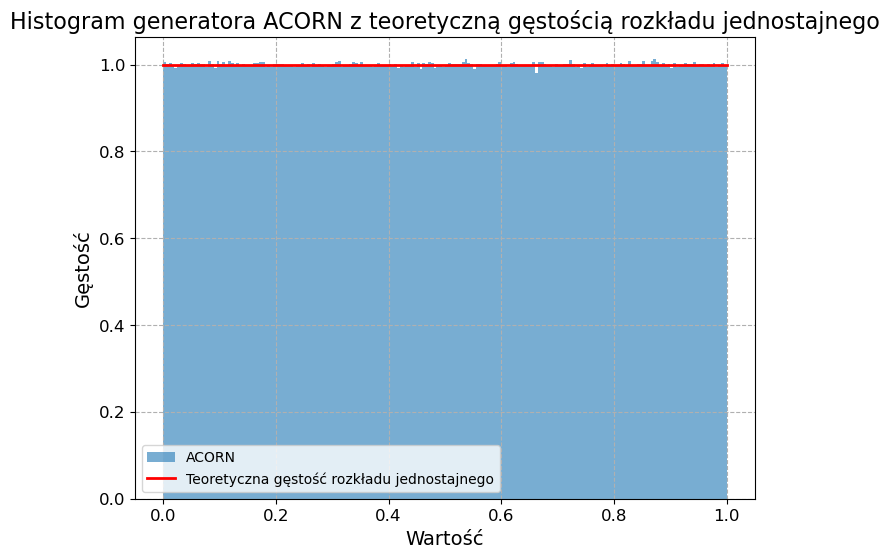

In [5]:
ACORN_NUMPY_HISTOGRAM(acorn_random_numbers, b)

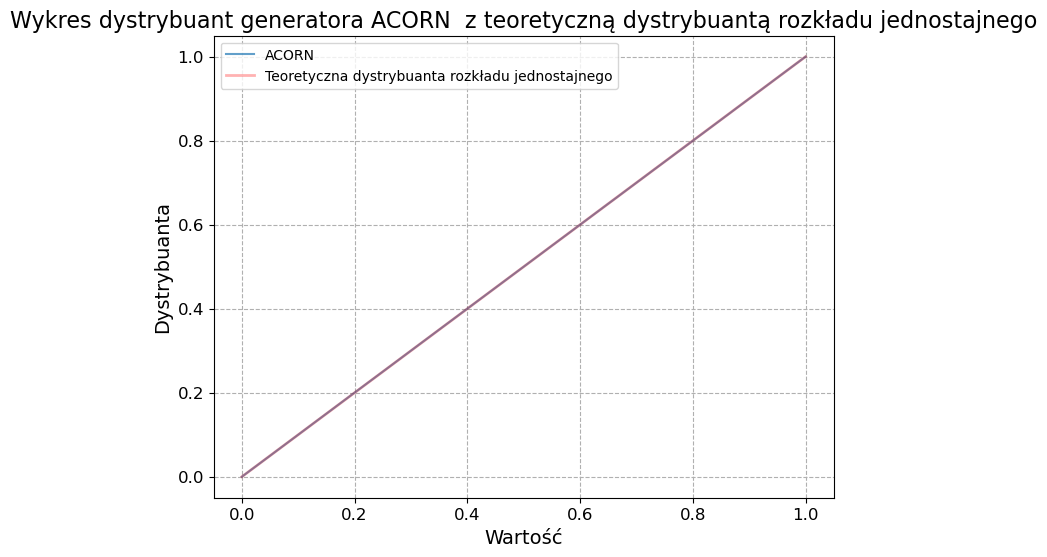

In [6]:
ACORN_NUMPY_DISTRIBUTION(acorn_random_numbers)

## Wnioski
Na podstawie analizy histogramu oraz wykresu dystrybuanty empirycznej można stwierdzić, że generator ACORN generuje liczby pseudolosowe z rozkładu jednostajnego na przedziale $[0, 1]$.

# Generowanie wykresu sekwencji $ Y_n^{k}$

Aby zobaczyć zachowanie się sekwencji $ Y_n^{k}$ w czasie, można wygenerować wykres, gdzie na osi x znajduje się numer kroku $𝑛$ , a na osi y wartość $ Y_n^{k}$.
Poniższa funkcja `PLOT_SEQUENCE_Y_KN` generuje taki wykres dla danej sekwencji $ Y_n^{k}$

In [12]:
def PLOT_SEQUENCE_Y_KN(sequence: list):
    '''
    Generuje wykres sekwencji Y_k^n dla generatora ACORN.

    Parametry:
    sequence (list): Lista sekwencji Y_k^n.
    
    Przykład użycia:
    >>> sequence = [0.1, 0.3, 0.5, 0.7, 0.9]
    >>> PLOT_SEQUENCE_Y_KN(sequence)
    '''
    # Wykres sekwencji Y_k^n
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(sequence)), sequence)
    plt.title(f'Sekwencja $Y_n^k$ dla n={len(sequence)}, lag={lag}', fontsize=16)
    plt.xlabel('n', fontsize=14)
    plt.ylabel('$Y_k^n$', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(linestyle = '--')
    plt.show()

In [13]:
# Parametry
M = 2**89 - 1
k = 9
n1 = 150 # Mniejsza ilość liczb losowych dla lepszej wizulacji sekwencji
n2 = 300

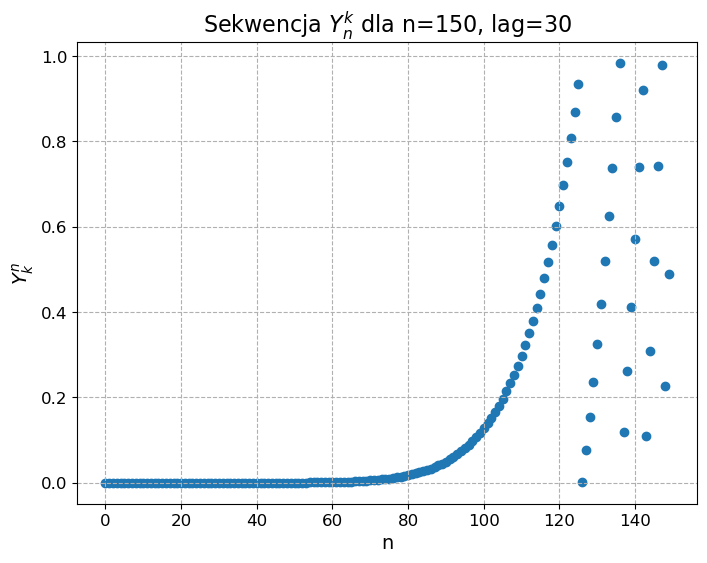

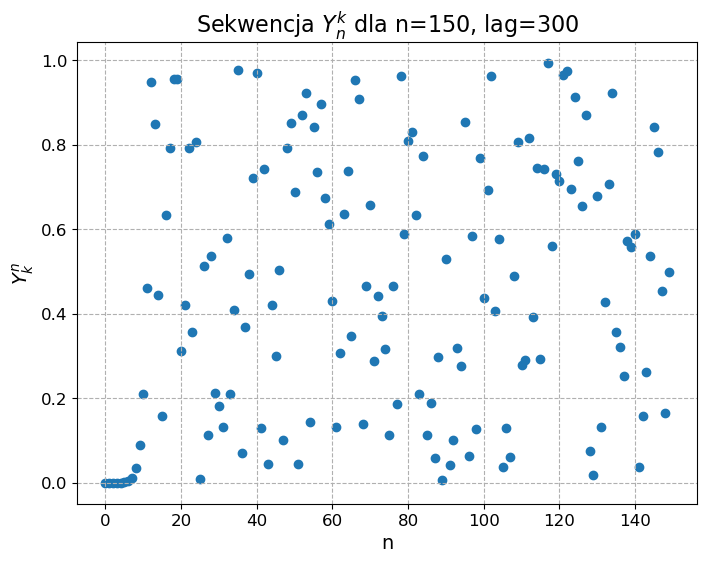

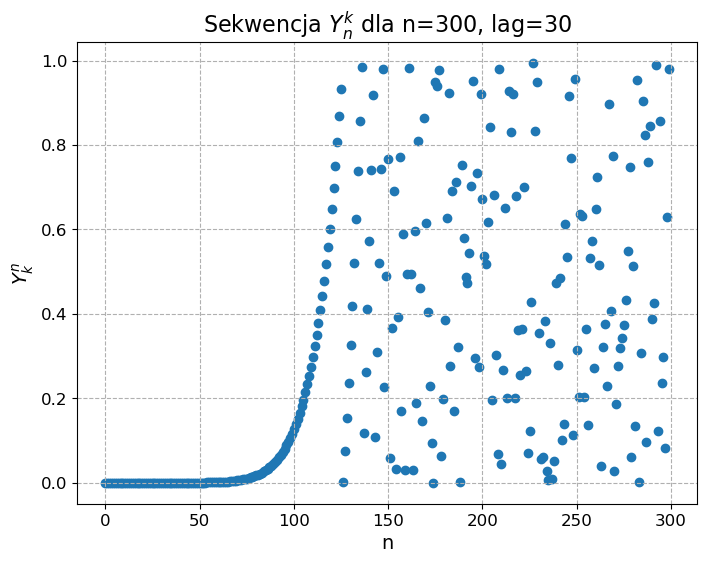

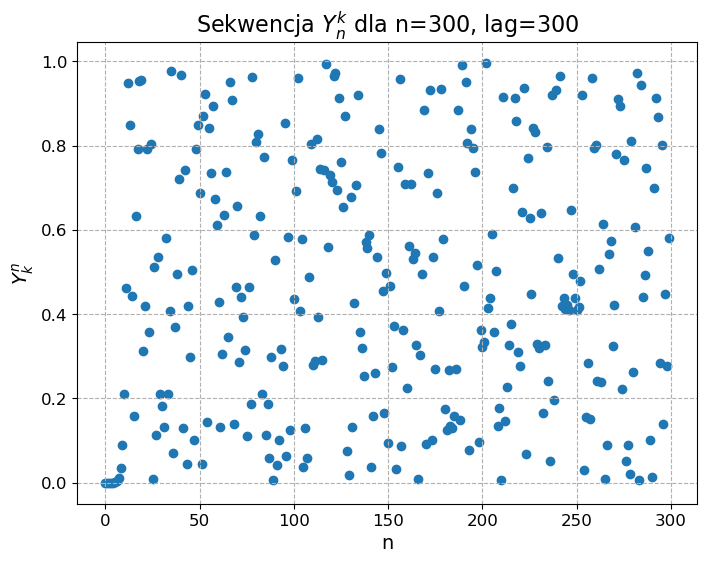

In [14]:
lag = 30
acorn = ACORNGenerator(k, M, lag)
acorn_random_numbers_1 = acorn.random_sequence(n1)
PLOT_SEQUENCE_Y_KN(acorn_random_numbers_1)
lag = 300
acorn = ACORNGenerator(k, M, lag)
acorn_random_numbers_2 = acorn.random_sequence(n1)
PLOT_SEQUENCE_Y_KN(acorn_random_numbers_2)

lag = 30
acorn = ACORNGenerator(k, M, lag)
acorn_random_numbers_3 = acorn.random_sequence(n2)
PLOT_SEQUENCE_Y_KN(acorn_random_numbers_3)
lag = 300
acorn = ACORNGenerator(k, M, lag)
acorn_random_numbers_4 = acorn.random_sequence(n2)
PLOT_SEQUENCE_Y_KN(acorn_random_numbers_4)

### Wnioski z wykresów sekwencji $Y_n$

1. **Sekwencje $Y_n$ dla $n = 150, \ \text{lag} = 30$** oraz **Sekwencje $Y_n$ dla $n = 300, \ \text{lag} = 30$**:
   - Wykres pokazuje rosnący charakter sekwencji $Y_n$ dla małych wartości $n$, które gwałtownie rosną w kierunku $n = 150$.
   - Wykres rozrzutu dla $\text{lag} = 30$ pokazuje mniej "losowy" układ punktów, wskazując na bardziej schematyczne zachowanie.


2. **Sekwencje $Y_n$ dla $n = 150, \ \text{lag} = 300$** oraz **Sekwencje $Y_n$ dla $n = 300, \ \text{lag} = 300$**:
   - Dla dużych wartości opóźnienia ($\text{lag} = 300$), wykresy rozrzutu pokazują niemal jednolity rozkład punktów w całym przedziale wartości $Y_n$, co może sugerować quasi-losowy charakter sekwencji przy dużych wartościach opóźnienia.

# Generowanie wykresu funkcji $ Y_{n-1}^{k} \rightarrow Y_{n}^{k}$

Ponadto, aby lepiej zrozumieć dynamikę zmian między kolejnymi krokami $n$ , można wygenerować wykres funkcji $ Y_{n-1}^{k} \rightarrow Y_{n}^{k}$, gdzie na osi x znajdują się wartości $Y_{n-1}^{k}$, a na osi y wartości $Y_{n}^{k}$.
Poniższa funkcja `PLOT_SEQUENCE_Y_KN1_KN` generuje taki wykres dla danej sekwencji $Y_{n}^{k}$.

In [15]:
def PLOT_SEQUENCE_Y_KN1_KN(sequence: list):
    '''
    Generuje wykres funkcji Y_k^{n-1} -> Y_k^n dla generatora ACORN.

    Parametry:
    sequence (list): Lista sekwencji Y_k^n.
    
    Przykład użycia:
    >>> sequence = [0.1, 0.3, 0.5, 0.7, 0.9]
    >>> PLOT_SEQUENCE_Y_KN1_KN(sequence)
    '''
    # Wykres funkcji Y_k^{n-1} -> Y_k^n
    plt.figure(figsize=(8, 6))
    plt.scatter(sequence[:-1], sequence[1:],color='r')
    plt.title(f'Funkcja $Y_{{n-1}}^k \\rightarrow Y_n^k$  dla n = {len(sequence)}, lag={lag}', fontsize=16)
    plt.xlabel('$Y_k^{n-1}$', fontsize=14)
    plt.ylabel('$Y_k^n$', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(linestyle = '--')
    plt.show()

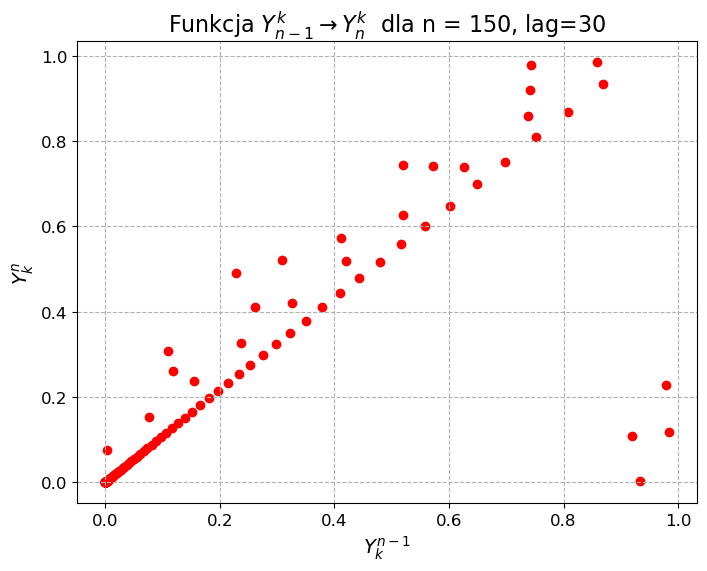

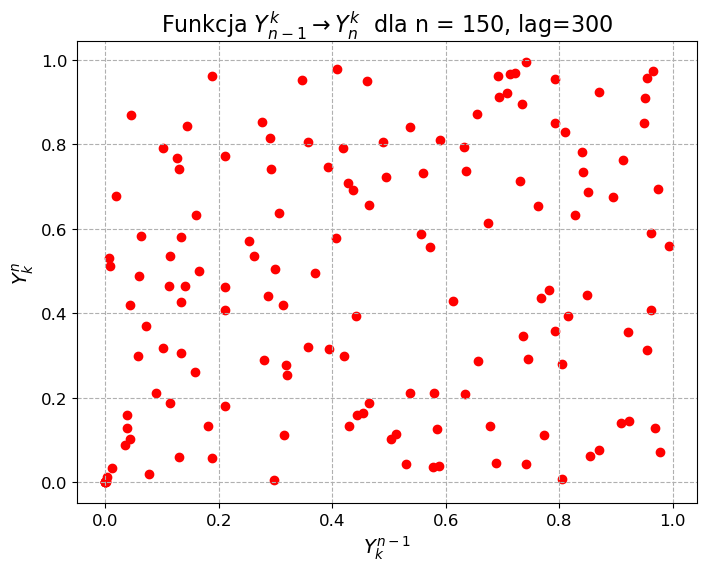

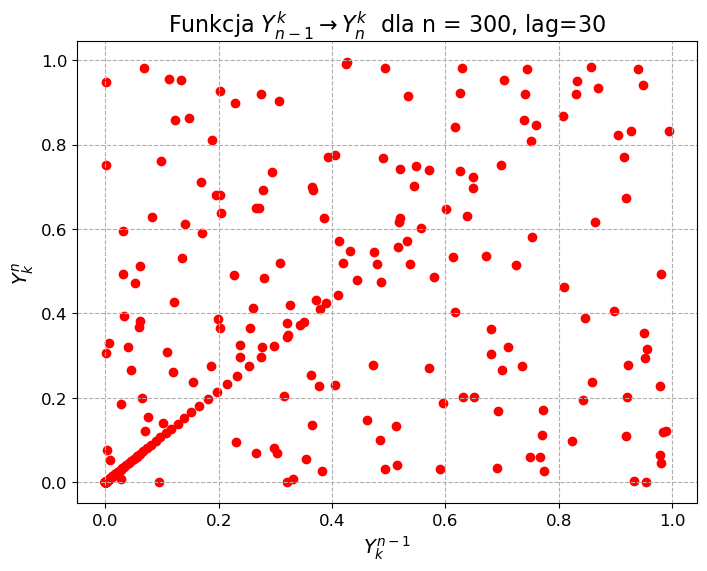

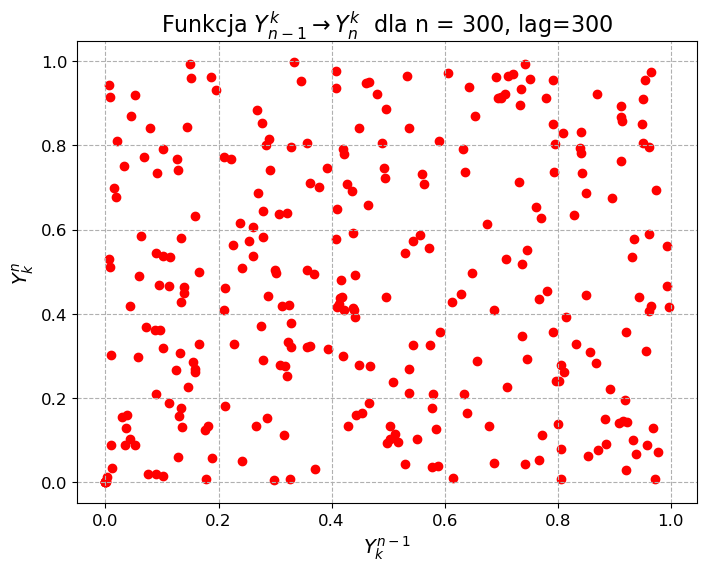

In [16]:
lag = 30
acorn = ACORNGenerator(k, M, lag)
acorn_random_numbers_1 = acorn.random_sequence(n1)
PLOT_SEQUENCE_Y_KN1_KN(acorn_random_numbers_1)
lag = 300
acorn = ACORNGenerator(k, M, lag)
acorn_random_numbers_2 = acorn.random_sequence(n1)
PLOT_SEQUENCE_Y_KN1_KN(acorn_random_numbers_2)

lag = 30
acorn = ACORNGenerator(k, M, lag)
acorn_random_numbers_3 = acorn.random_sequence(n2)
PLOT_SEQUENCE_Y_KN1_KN(acorn_random_numbers_3)
lag = 300
acorn = ACORNGenerator(k, M, lag)
acorn_random_numbers_4 = acorn.random_sequence(n2)
PLOT_SEQUENCE_Y_KN1_KN(acorn_random_numbers_4)

### Wnioski z wykresów funkcji $Y_n \to Y_{n+1}$

1. **Funkcja $Y_n \to Y_{n+1}$ dla $n = 150, \ \text{lag} = 30$** oraz **Funkcja $Y_n \to Y_{n+1}$ dla $n = 300, \ \text{lag} = 30$**:
   - Wykres pokazuje wyraźną liniową zależność między $Y_n$ a $Y_{n+1}$ dla małych wartości $n$, co wskazuje na deterministyczne zachowanie sekwencji w tych przedziałach.
   - Dla większych wartości $n$, zależność staje się mniej wyraźna, co może sugerować bardziej złożoną dynamikę.

2. **Funkcja $Y_n \to Y_{n+1}$ dla $n = 150, \ \text{lag} = 300$** oraz **Funkcja $Y_n \to Y_{n+1}$ dla $n = 300, \ \text{lag} = 300$**:
   - Dla większych wartości $n$ i $\text{lag}$, wykresy rozrzutu stają się bardziej chaotyczne i nie wykazują wyraźnej liniowej zależności, co sugeruje, że system wykazuje bardziej złożone, nieliniowe zachowanie.

## Ogólne wnioski

- **Deterministyczne i Chaotyczne Zachowanie**: Sekwencje generowane przez generator ACORN dla małych wartości $n$ i niskich opóźnień wykazują wyraźne, deterministyczne zachowanie. Jednak wraz ze wzrostem wartości $n$ oraz opóźnień, sekwencje stają się bardziej chaotyczne i trudniejsze do przewidzenia.
- **Wpływ Parametrów**: Zwiększenie liczby próbek $n$ oraz wartości opóźnienia ($\text{lag}$) wpływa na złożoność i rozkład punktów w wykresach, co może wskazywać na bardziej złożone dynamiki systemu generującego dane.
- **Możliwość Quasi-losowego Zachowania**: Dla dużych wartości $\text{lag}$, wykresy sugerują quasi-losowy charakter sekwencji generowanych przez generator ACORN, co może być istotne przy analizie długoterminowych prognoz czy modelowania danych opartego na tych sekwencjach.

# Porównanie czasów generowania liczb pseudolosowych ACORN vs NumPy
Funkcja`COMPARE_RANDOM_GENERATION_TIMES_NUMPY` służy do porównania czasów generowania liczb pseudolosowych przez generator ACORN i generator NumPy dla różnych wartości n.

Wykres ten pozwala na porównanie wydajności generowania liczb pseudolosowych przez generator ACORN i NumPy dla różnych rozmiarów próbek.

In [13]:
def COMPARE_RANDOM_GENERATION_TIMES_NUMPY(M: int, k: int, lag: int, n_values: list, m: int):
    '''
    Porównuje czasy generowania liczb pseudolosowych przez generator ACORN i generator NumPy dla różnych wartości n.

    Parametry:
    M (int): Moduł używany do obliczeń w generatorze ACORN.
    k (int): Liczba stanów w generatorze ACORN.
    lag (int): Liczba kroków opóźnienia w generatorze ACORN.
    n_values (list): Lista zawierająca różne wartości n (liczby liczb pseudolosowych) do przetestowania.
    m (int): Liczba powtórzeń dla każdej wartości n.
    
    Przykład użycia:
    >>> M = 2**89 - 1
    >>> k = 9
    >>> lag = 10*3
    >>> n_values = [1000, 2000, 3000]
    >>> m = 100
    >>> COMPARE_RANDOM_GENERATION_TIMES_NUMPY(M, k, lag, n_values, m)
    '''
    
    acorn = ACORNGenerator(k, M, lag)
    
    acorn_avg_times: List[float] = []  # Lista przechowująca średnie czasy generowania liczb przez ACORN
    numpy_avg_times: List[float] = []  # Lista przechowująca średnie czasy generowania liczb przez NumPy

    for n in n_values:
        acorn_time = timeit.timeit(lambda: acorn.random_sequence(n), number=m)
        numpy_time = timeit.timeit(lambda: np.random.random(n), number=m)

        # Obliczanie średniego czasu dla ACORN i NumPy
        acorn_avg_time = acorn_time / m
        numpy_avg_time = numpy_time / m
        acorn_avg_times.append(acorn_avg_time)
        numpy_avg_times.append(numpy_avg_time)
        print(f"Dla n={n}")
        print(f"ACORN średni czas: {acorn_avg_time} s")
        print(f"NumPy średni czas: {numpy_avg_time} s")
        print("")

    # Wykres porównujący średnie czasy generowania
    plt.figure(figsize=(8, 6))
    plt.plot(n_values, acorn_avg_times, label='ACORN', marker='o')
    plt.plot(n_values, numpy_avg_times, label='NumPy', marker='o')
    plt.title('Porównanie średnich czasów generowania liczb pseudolosowych')
    plt.xlabel('Liczba generowanych liczb')
    plt.ylabel('Średni czas (s)')
    plt.legend()
    plt.grid(linestyle = '--')
    plt.show()

In [14]:
#Parametry
M = 2**89 - 1
k = 9
lag = 10*3
n_values = np.arange(1000,20001,1000)
m = 100

Dla n=1000
ACORN średni czas: 0.055785845999998855 s
NumPy średni czas: 6.632000004174188e-06 s

Dla n=2000
ACORN średni czas: 0.1126437679999799 s
NumPy średni czas: 1.1202999994566198e-05 s

Dla n=3000
ACORN średni czas: 0.17630266299998765 s
NumPy średni czas: 1.600800002051983e-05 s

Dla n=4000
ACORN średni czas: 0.22993535900001005 s
NumPy średni czas: 2.114800001436379e-05 s

Dla n=5000
ACORN średni czas: 0.2952242219999971 s
NumPy średni czas: 2.5716000018292106e-05 s

Dla n=6000
ACORN średni czas: 0.3523798619999798 s
NumPy średni czas: 3.0369999985850883e-05 s

Dla n=7000
ACORN średni czas: 0.40693321700000523 s
NumPy średni czas: 3.542900001775706e-05 s

Dla n=8000
ACORN średni czas: 0.45107512399998084 s
NumPy średni czas: 4.1582000012567735e-05 s

Dla n=9000
ACORN średni czas: 0.5149548349999895 s
NumPy średni czas: 4.547200001979945e-05 s

Dla n=10000
ACORN średni czas: 0.5744212800000241 s
NumPy średni czas: 5.026499999075895e-05 s

Dla n=11000
ACORN średni czas: 0.622003

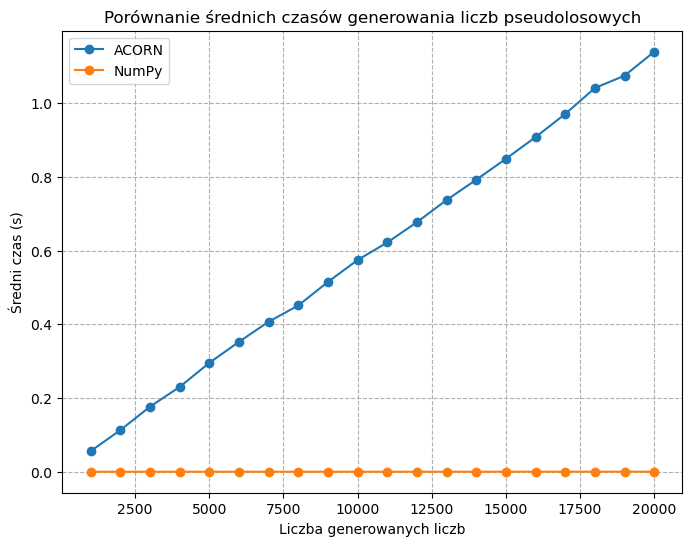

In [15]:
COMPARE_RANDOM_GENERATION_TIMES_NUMPY(M, k, lag, n_values, m)

### Wnioski

Dzięki przeprowadzonemu kodowi porównawczemu czasów generowania liczb pseudolosowych przez generator ACORN i NumPy, stwierdzono, że NumPy osiąga znacznie krótsze czasy generacji, co sugeruje jego wyższą wydajność w porównaniu do ACORN.
